<a href="https://colab.research.google.com/github/Saurav-Raghaw/DataScience/blob/main/Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recommender system from scratch.

1. What is a Recommender System?
* A recommender system is an information filtering system that seeks to predicts the rating given by a user to an item. This predicted rating then used to recommend items to the user. The item for which the predicted rating is high will be recommended to the user. 

* This recommender system is utilized in recommendation of a broad range of items. For instance, it can be used to recommend movies, products, videos, music, books, news, Facebook friends, clothes, Twitter pages, Android/ios apps, hotels, restaurants, routes etc.

* It is used by almost all of the major companies to enhance their business and to enrich user experience like YouTube for recommending videos, Amazon & Ebay for recommending products, Netflix for recommending Movies, Airbnb for recommending rooms and hotels, Facebook for recommending friends etc.

2. What is use-item matrix?

* In USER-ITEM matrix, each row represents a user and each column represents an item and each cell represents rating given by a user to an item.

* USER-ITEM matrix is very sparse matrix, which means that many cells in this matrix are empty. Since, there are many items, and a single user cannot give rating to all of the items. In real-world, a single user does not give ratings to even 1% of the total items. Therefore, around 99% of the cells of this matrix are empty.



3. How to calculate the sparsity of the USER-ITEM matrix?

* Sparsity of Matrix = Number of Empty cells / Total Number of cells.


4. So, What is the main task of RS?(Recommendation System)
* As we explained, if there is a user Ui who likes item I1, I5, I7 (Columns in USER-ITEM matrix). Then we have to recommend user Ui an item Ij, which he/she will most probably like.

5. How many types of RS?

```
1. Collaborative Filtering
2. Content Based Filtering
3. Similarity Based Filtering
4. Matrix Factorization
```

6. How Collaborative Filtering works?

* Collaborative filtering RS works with the collaboration of users. If there are many users who liked some item then that item can be recommended to that user who hasn’t seen that item yet.

* Let say there are four users and four items. All four users bought Item-1 and Item-2. USER-1, USER -2 and USER -3 bought Item-3 also but USER-4 hasn’t seen Item-3 yet. So, Item-3 can be recommended to USER -4.
* So the Core-idea/assumption here is that the users who have agreed in the past tend to also agree in the future.

* If above assumption does not hold true then collaborative based filtering RS cannot be build.


7.  How contebt based Filtering works?
*  Content based filtering is similar in approach with classical machine learning techniques. It needs a way to represent an item Ij and a user Ui. Here, we need to collect information about an item Ij and a user Ui then finally we need to create features of both user Ui and Ij. Then we combine those features and feed them to a Machine Learning model for training. Here, label will be Aij, which is the corresponding rating given by a user Ui on item Ij.

8. Similarity Based

There are broadly two types of similarity based approaches:
* USER-USER SIMILARITY
* ITEM-ITEM SIMILARITY

Note: As a rule of thumb, when we have more users than items and when item ratings do not change much over time after the initial period then ITEM-ITEM similarity based RS is preferable over USER-USER based RS.

9. Matrix Factorization.
[Here](https://medium.datadriveninvestor.com/how-to-built-a-recommender-system-rs-616c988d64b2)

#We will work on the MovieLens dataset and build a model to recommend movies to the end users. 

Dataset Description: MovieLens data set.

This data set consists of:
* 100,000 ratings (1-5) from 943 users on 1682 movies. 
* Each user has rated at least 20 movies. 
* Simple demographic info for the users (age, gender, occupation, zip)

Acknowledgements: 

The dataset was downloaded from https://grouplens.org/datasets/movielens/100k/


#Importing Liabraries.


In [ ]:
!pip install surprise 

     |████████████████████████████████| 11.8MB 253kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617591 sha256=e3d2f38f81e42a33af304dd00f4e176e2613d6b30e5a7d259b358e3193130bab
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset #About Surprise: http://surpriselib.com/

##About surprise:

* Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.

* We can use both built-in datasets (Movielens, Jester), and our own custom datasets.

* This module provide various ready-to-use prediction algorithms such as baseline algorithms, neighborhood methods, matrix factorization-based ( SVD, PMF, SVD++, NMF), and many others. Also, various similarity measures (cosine, MSD, pearson…) are built-in.

* The name SurPRISE (roughly :) stands for Simple Python RecommendatIon System Engine.

* Please note that surprise does not support implicit ratings or content-based information.

* https://surprise.readthedocs.io/en/stable/getting_started.html



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##1.Loading the Dataset.

In [ ]:
# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [ ]:
#Passing the column names for each CSV as the column name is not given in the file and read them using pandas.
#Reading users file:

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv('u.user', sep='|', names=u_cols,encoding='latin-1')

users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
print(users.shape)
print(users.dtypes)
print(users.info())

(943, 5)
user_id        int64
age            int64
sex           object
occupation    object
zip_code      object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   sex         943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


In [ ]:
#Reading ratings file:

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings = pd.read_csv('u.data', sep='\t', names=r_cols,encoding='latin-1')

#column names from the readme file.

ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
print(ratings.shape)
print(ratings.dtypes)
print(ratings.info())

(100000, 4)
user_id           int64
movie_id          int64
rating            int64
unix_timestamp    int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   user_id         100000 non-null  int64
 1   movie_id        100000 non-null  int64
 2   rating          100000 non-null  int64
 3   unix_timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


In [ ]:
#Reading items file:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
'Sci-Fi', 'Thriller', 'War', 'Western']

items = pd.read_csv('u.item', sep='|', names=i_cols,encoding='latin-1')

items.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
print(items.shape)
print(items.dtypes)
print(items.info())

(1682, 24)
movie id                int64
movie title            object
release date           object
video release date    float64
IMDb URL               object
unknown                 int64
Action                  int64
Adventure               int64
Animation               int64
Children's              int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film-Noir               int64
Horror                  int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 

* video release date, IMDB URL and release date has missing values.

* This dataset contains attributes of 1682 movies. There are 24 columns out of which last 19 columns specify the genre of a particular movie. These are binary columns, i.e., a value of 1 denotes that the movie belongs to that genre, and 0 otherwise.

#2. Train Set and Test Set.
* The dataset has already been divided into train and test by GroupLens where the test data has 10 ratings for each user, i.e. 9,430 rows in total. 

In [ ]:
#Reading the train and Test set.

ratings_train = pd.read_csv('ua.base', sep='\t', names=r_cols, encoding='latin-1')

ratings_test = pd.read_csv('ua.test', sep='\t', names=r_cols, encoding='latin-1')

ratings_train.shape, ratings_test.shape

((53219, 4), (9430, 4))

#3. Building the Similarity based filtering model.

Why Similarity?(Above)

* We will recommend movies based on user-user similarity and item-item similarity and will try to evaluate the model based on the RMSE.

In [ ]:
#1. calculating the number of unique users and movies.

n_users = ratings.user_id.unique().shape[0]
n_items = ratings.movie_id.unique().shape[0]

print(n_users)
print(n_items)

943
1682


In [ ]:
 #2. Creating a user-item matrix which can be used to calculate the similarity between users and items. 
 #we will first initialize it with zeros array of shape 943 x 1643 having 943 users and 1643 movies.

data_matrix = np.zeros((n_users, n_items))
print(data_matrix.shape)

(943, 1682)


In [ ]:
#3. Filling the user-item matrix with corresponding ratings. Matrix would be sparse.

for index in ratings.itertuples():
  data_matrix[index[1]-1, index[2]-1] = index[3]

#itertuples() method will return an iterator yielding a named tuple for each row in the DataFrame. 
#The first element of the tuple will be the row’s corresponding index value, 
#while the remaining values are the row values.

#Note: in ratings dataset (user_id, movie_id) is unique.

data_matrix

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [ ]:
#4. Calculating the similarity. 
#We can use the pairwise_distance function from sklearn to calculate the cosine similarity.

from sklearn.metrics.pairwise import pairwise_distances

#USER-USER Similarity
user_similarity = pairwise_distances(data_matrix, metric='cosine')

#ITEM-ITEM Similarity
item_similarity = pairwise_distances(data_matrix.T, metric='cosine')

#This gives us the item-item and user-user similarity in an array form.
#cosine similarity can range from ‘0’ to ‘1’ and ‘1’ means highest similarity, 

item_similarity

array([[0.        , 0.59761782, 0.66975521, ..., 1.        , 0.95281693,
        0.95281693],
       [0.59761782, 0.        , 0.72693082, ..., 1.        , 0.92170064,
        0.92170064],
       [0.66975521, 0.72693082, 0.        , ..., 1.        , 1.        ,
        0.90312495],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.95281693, 0.92170064, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.95281693, 0.92170064, 0.90312495, ..., 1.        , 1.        ,
        0.        ]])

* sklearn.metrics.pairwise_distances()

This method takes either a vector array or a distance matrix, and returns a distance matrix. If the input is a vector array, the distances are computed. If the input is a distances matrix, it is returned instead.

This method provides a safe way to take a distance matrix as input, while preserving compatibility with many other algorithms that take a vector array.
Valid values for metric are:

* From scikit-learn: 

* [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]. These metrics support sparse matrix inputs. 

* [‘nan_euclidean’] but it does not yet support sparse matrices.

In [ ]:
print(user_similarity.shape)
print(item_similarity.shape)

(943, 943)
(1682, 1682)


In [ ]:
#5. Making predictions based on these similarities.

def predict(ratings, similarity, type='user'):
  if type == 'user':
    mean_user_rating = ratings.mean(axis=1).reshape(-1,1)  #We use np.newaxis so that mean_user_rating has same format as ratings
    #we are taking mean of axis=1 (rows)

    ratings_diff = (ratings - mean_user_rating)
    pred = mean_user_rating + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T

  elif type == 'item':
    pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

  return pred


##How UESR-USER similarity based RS works?

1. Finds the similarity score between users.
2. Based on this similarity score, it then picks out the most similar users and recommends products which these similar users have liked or bought previously.

* The prediction of an item for a user u is calculated by computing the weighted sum of the user ratings given by other users to an item i.

* The prediction Pu,i is given by:



> 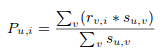



Here,

* Pu,i is the prediction of an item
* Rv,i is the rating given by a user v to a movie i
* Su,v is the similarity between users

Now, we have the ratings for users in profile vector and based on that we have to predict the ratings for other users.

1. For predictions we need the similarity between the user u and v. We can make use of Pearson correlation.

2. First we find the items rated by both the users and based on the ratings, correlation between the users is calculated.

3. The predictions can be calculated using the similarity values. This algorithm, first of all calculates the similarity between each user and then based on each similarity calculates the predictions. Users having higher correlation will tend to be similar.

4. Based on these prediction values, recommendations are made. 

https://medium.com/@lope.ai/recommendation-systems-from-scratch-in-python-pytholabs-6946491e76c2

In [ ]:
user_prediction = predict(data_matrix, user_similarity, type='user')
print('USER-USER Similarity\n')
print('RMSE: ', np.sqrt(np.sum((data_matrix - user_prediction)**2)/data_matrix.size))

USER-USER Similarity

RMSE:  0.8299073588614706


In [ ]:
item_prediction = predict(data_matrix, item_similarity, type='item')
print('ITEM-ITEM Similarity\n')
print('RMSE: ', np.sqrt(np.sum((data_matrix - item_prediction)**2)/data_matrix.size))

ITEM-ITEM Similarity

RMSE:  0.8917591527347898


In [ ]:
item_prediction

array([[0.44627765, 0.475473  , 0.50593755, ..., 0.58815455, 0.5731069 ,
        0.56669645],
       [0.10854432, 0.13295661, 0.12558851, ..., 0.13445801, 0.13657587,
        0.13711081],
       [0.08568497, 0.09169006, 0.08764343, ..., 0.08465892, 0.08976784,
        0.09084451],
       ...,
       [0.03230047, 0.0450241 , 0.04292449, ..., 0.05302764, 0.0519099 ,
        0.05228033],
       [0.15777917, 0.17409459, 0.18900003, ..., 0.19979296, 0.19739388,
        0.20003117],
       [0.24767207, 0.24489212, 0.28263031, ..., 0.34410424, 0.33051406,
        0.33102478]])